In [13]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

In [9]:
# import the dataset
X_test = pd.read_csv('X_test.csv')
X_train = pd.read_csv('X_train.csv')
y_test = pd.read_csv('y_test.csv').squeeze()
y_train = pd.read_csv('y_train.csv').squeeze()

In [18]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)  # You can adjust the parameters

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [19]:
# Predict on the test data
y_pred = rf_model.predict(X_test)

In [20]:
# Note: Use predict_proba to get the probabilities for the positive class
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

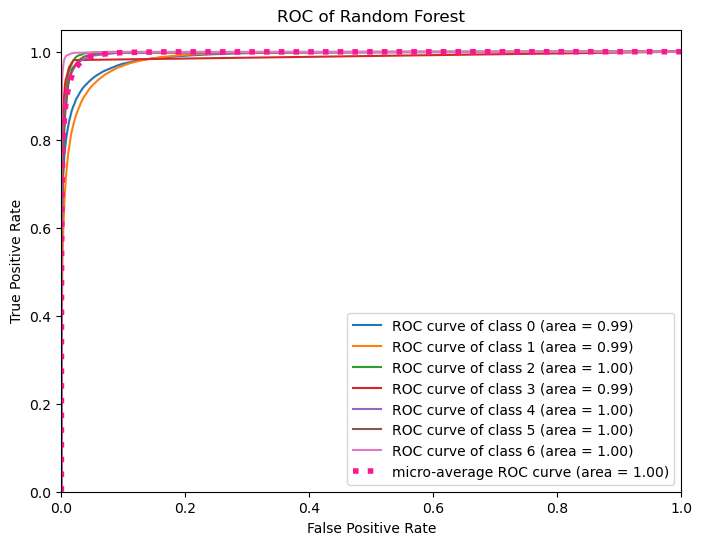

In [26]:
# Binarize the output classes for the multiclass case
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Calculate probabilities for each class
y_pred_proba = rf_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Random Forest')
plt.legend(loc="lower right")
plt.show()

In [22]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.9409    0.9152    0.9279     42557
           2     0.9219    0.9528    0.9371     56500
           3     0.8872    0.9100    0.8984      7121
           4     0.8044    0.6882    0.7418       526
           5     0.8775    0.6717    0.7609      1995
           6     0.8650    0.7913    0.8265      3489
           7     0.9597    0.9425    0.9510      4015

    accuracy                         0.9252    116203
   macro avg     0.8938    0.8388    0.8634    116203
weighted avg     0.9250    0.9252    0.9246    116203



In [23]:

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.925174048862766
